## Package dan Data yang Digunakan

#### [Data yang Digunakan](https://academy.dqlab.id/main/projectcode/245/411/2078?pr=0)

In [5]:
df_event <- read.csv('https://storage.googleapis.com/dqlab-dataset/event.csv', stringsAsFactors = F)

dplyr::glimpse(df_event)

Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, 2…
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163, …
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pay…
$ created_at  <chr> "2019-07-07 11:47:58", "2019-07-07 11:48:16", "2019-07-07 …


#### [Mengubah kolom created_at menjadi tipe Timestamp](https://academy.dqlab.id/main/projectcode/245/411/2079?pr=0)

In [6]:
library(lubridate)

df_event$created_at <- ymd_hms(df_event$created_at)

dplyr::glimpse(df_event)

Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, 2…
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163, …
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pay…
$ created_at  <dttm> 2019-07-07 11:47:58, 2019-07-07 11:48:16, 2019-07-07 13:1…


## Data per Event

#### [Summary Event](https://academy.dqlab.id/main/livecode/245/412/2080?pr=0)

In [7]:
library(dplyr)

df_event %>%
  group_by(nama_event) %>%
  summarise(jumlah_event = n(), 
            loan = n_distinct(loan_id), 
            investor = n_distinct(investor_id))

nama_event,jumlah_event,loan,investor
<chr>,<int>,<int>,<int>
investor_order_loan,3714,3641,804
investor_pay_loan,3632,3632,771
investor_register,17931,1,17931
investor_view_loan,4616,3678,1095
loan_to_marketplace,3678,3678,1


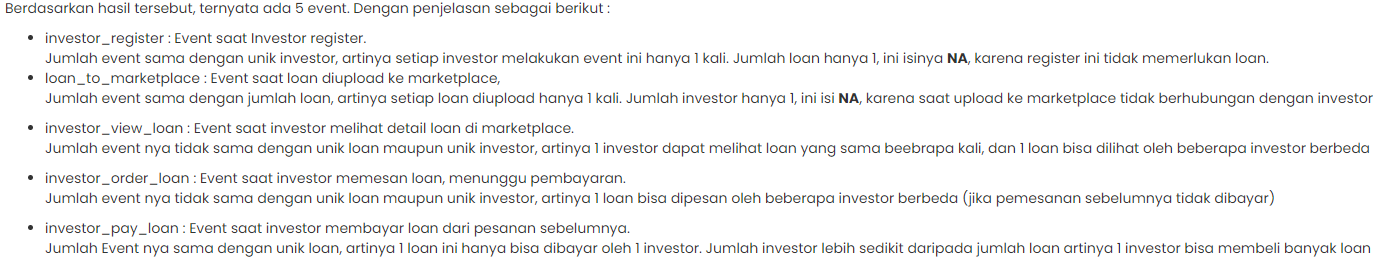

## Mengubah format data proses investasi loan agar nama event menjadi nama kolom

#### [Event loan di-upload ke marketplace](https://academy.dqlab.id/main/livecode/245/413/2082?pr=0)

In [8]:
df_marketplace <- df_event %>% 
  filter(nama_event == 'loan_to_marketplace') %>% 						
  select(loan_id, marketplace = created_at)
   
df_marketplace

loan_id,marketplace
<int>,<dttm>
1,2019-07-06 09:03:04
2,2019-07-06 09:00:00
3,2019-07-06 09:03:04
4,2019-07-06 09:03:04
5,2019-07-05 11:45:07
6,2019-07-08 16:35:28
7,2019-07-14 10:16:27
8,2019-07-05 11:45:07
9,2019-07-05 11:45:07


#### [Event investor melihat detail loan](https://academy.dqlab.id/main/livecode/245/413/2083?pr=0)

In [9]:
df_view_loan <- df_event %>% 
  filter(nama_event == 'investor_view_loan') %>% 
  group_by(loan_id, investor_id) %>% 
  summarise(jumlah_view = n(), 
            pertama_view = min(created_at), 
            terakhir_view = max(created_at))
            
df_view_loan

`summarise()` has grouped output by 'loan_id'. You can override using the
`.groups` argument.


loan_id,investor_id,jumlah_view,pertama_view,terakhir_view
<int>,<int>,<int>,<dttm>,<dttm>
1,107,1,2019-07-07 11:48:11,2019-07-07 11:48:11
2,114,1,2019-07-07 11:47:58,2019-07-07 11:47:58
3,97,1,2019-07-06 09:50:00,2019-07-06 09:50:00
4,97,1,2019-07-06 09:49:20,2019-07-06 09:49:20
5,107,1,2019-07-05 12:54:25,2019-07-05 12:54:25
6,163,1,2019-07-08 16:40:31,2019-07-08 16:40:31
7,133,2,2019-07-14 11:04:46,2019-07-14 11:16:18
8,71,1,2019-07-05 11:47:10,2019-07-05 11:47:10
8,79,1,2019-07-05 12:05:14,2019-07-05 12:05:14


#### [Event investor pesan dan bayar loan](https://academy.dqlab.id/main/livecode/245/413/2084?pr=0)

In [10]:
library(tidyr)

df_order_pay <- df_event %>%
  filter(nama_event %in% c('investor_order_loan', 'investor_pay_loan')) %>%
  spread(nama_event, created_at) %>%
  select(loan_id, 
         investor_id, 
         order = investor_order_loan, 
         pay = investor_pay_loan)
         
df_order_pay

loan_id,investor_id,order,pay
<int>,<int>,<dttm>,<dttm>
1,107,2019-07-07 11:48:57,2019-07-07 12:02:18
2,114,2019-07-07 11:48:16,2019-07-07 13:14:39
3,97,2019-07-06 09:50:02,2019-07-06 10:14:44
4,97,2019-07-06 09:49:23,2019-07-06 09:59:51
5,107,2019-07-05 12:55:15,2019-07-05 13:55:54
6,163,2019-07-08 16:42:03,2019-07-08 16:45:56
7,133,2019-07-14 11:16:54,2019-07-14 11:22:00
8,79,2019-07-05 12:06:21,2019-07-05 17:04:56
9,79,2019-07-05 12:11:43,2019-07-05 17:04:52


#### [Gabungan Data Loan Investasi](https://academy.dqlab.id/main/livecode/245/413/2085?pr=0)

In [11]:
df_loan_invest <- df_marketplace %>% 
  left_join(df_view_loan, by = 'loan_id') %>% 
  left_join(df_order_pay, by = c('loan_id','investor_id'))
  
df_loan_invest

loan_id,marketplace,investor_id,jumlah_view,pertama_view,terakhir_view,order,pay
<int>,<dttm>,<int>,<int>,<dttm>,<dttm>,<dttm>,<dttm>
1,2019-07-06 09:03:04,107,1,2019-07-07 11:48:11,2019-07-07 11:48:11,2019-07-07 11:48:57,2019-07-07 12:02:18
2,2019-07-06 09:00:00,114,1,2019-07-07 11:47:58,2019-07-07 11:47:58,2019-07-07 11:48:16,2019-07-07 13:14:39
3,2019-07-06 09:03:04,97,1,2019-07-06 09:50:00,2019-07-06 09:50:00,2019-07-06 09:50:02,2019-07-06 10:14:44
4,2019-07-06 09:03:04,97,1,2019-07-06 09:49:20,2019-07-06 09:49:20,2019-07-06 09:49:23,2019-07-06 09:59:51
5,2019-07-05 11:45:07,107,1,2019-07-05 12:54:25,2019-07-05 12:54:25,2019-07-05 12:55:15,2019-07-05 13:55:54
6,2019-07-08 16:35:28,163,1,2019-07-08 16:40:31,2019-07-08 16:40:31,2019-07-08 16:42:03,2019-07-08 16:45:56
7,2019-07-14 10:16:27,133,2,2019-07-14 11:04:46,2019-07-14 11:16:18,2019-07-14 11:16:54,2019-07-14 11:22:00
8,2019-07-05 11:45:07,71,1,2019-07-05 11:47:10,2019-07-05 11:47:10,NA,NA
8,2019-07-05 11:45:07,79,1,2019-07-05 12:05:14,2019-07-05 12:05:14,2019-07-05 12:06:21,2019-07-05 17:04:56


## Analisis Proses Investasi

#### [Melihat hubungan jumlah view dengan order](https://academy.dqlab.id/main/livecode/245/414/2086?pr=0)

In [12]:
df_loan_invest %>%
  mutate(status_order = ifelse(is.na(order),'not_order','order')) %>%
  count(jumlah_view, status_order) %>%
  spread(status_order, n, fill = 0) %>%
  mutate(persen_order = scales::percent(order/(order+not_order)))

jumlah_view,not_order,order,persen_order
<int>,<dbl>,<dbl>,<chr>
1,570,3513,86.0%
2,20,173,89.6%
3,3,23,88.5%
4,0,3,100.0%
5,1,1,50.0%
7,0,1,100.0%
40,1,0,0.0%


#### [Berapa lama waktu yang dibutuhkan investor untuk pesan sejak pertama melihat detail loan](https://academy.dqlab.id/main/livecode/245/414/2087?pr=0)

In [13]:
df_loan_invest %>%
  filter(!is.na(order)) %>%
  mutate(lama_order_view = as.numeric(difftime(order, pertama_view, units = "mins"))) %>% 
  group_by(jumlah_view) %>% 
  summarise_at(vars(lama_order_view), funs(total = n(), min, median, mean, max)) %>% 
  mutate_if(is.numeric, funs(round(.,2)))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


jumlah_view,total,min,median,mean,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3513,0.03,1.35,2.97,79.65
2,173,0.43,22.07,61.10,2446.02
3,23,7.25,32.05,66.40,494.52
4,3,17.07,33.87,34.06,51.25
5,1,1113.35,1113.35,1113.35,1113.35
7,1,549.27,549.27,549.27,549.27


#### [Rata- rata waktu pemesanan sejak loan di-upload setiap minggu nya](https://academy.dqlab.id/main/livecode/245/414/2088?pr=0)

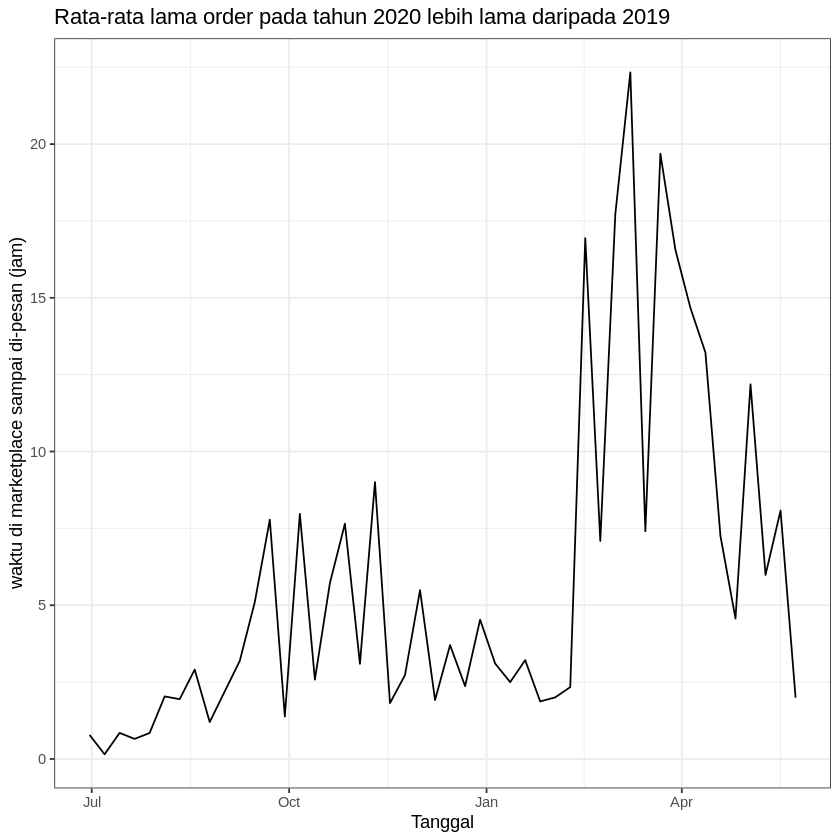

In [15]:
library(ggplot2)

df_lama_order_per_minggu <- df_loan_invest %>% 
  filter(!is.na(order)) %>%
  mutate(tanggal = floor_date(marketplace, 'week'),
         lama_order = as.numeric(difftime(order, marketplace, units = "hour"))) %>% 
  group_by(tanggal) %>%
  summarise(lama_order = median(lama_order)) 

ggplot(df_lama_order_per_minggu) +
  geom_line(aes(x = tanggal, y = lama_order)) +
  theme_bw() + 
  labs(title = "Rata-rata lama order pada tahun 2020 lebih lama daripada 2019",
       x = "Tanggal",
       y = "waktu di marketplace sampai di-pesan (jam)")

#### [Apakah Investor membayar pesanan yang dia buat?](https://academy.dqlab.id/main/livecode/245/414/2089?pr=0)

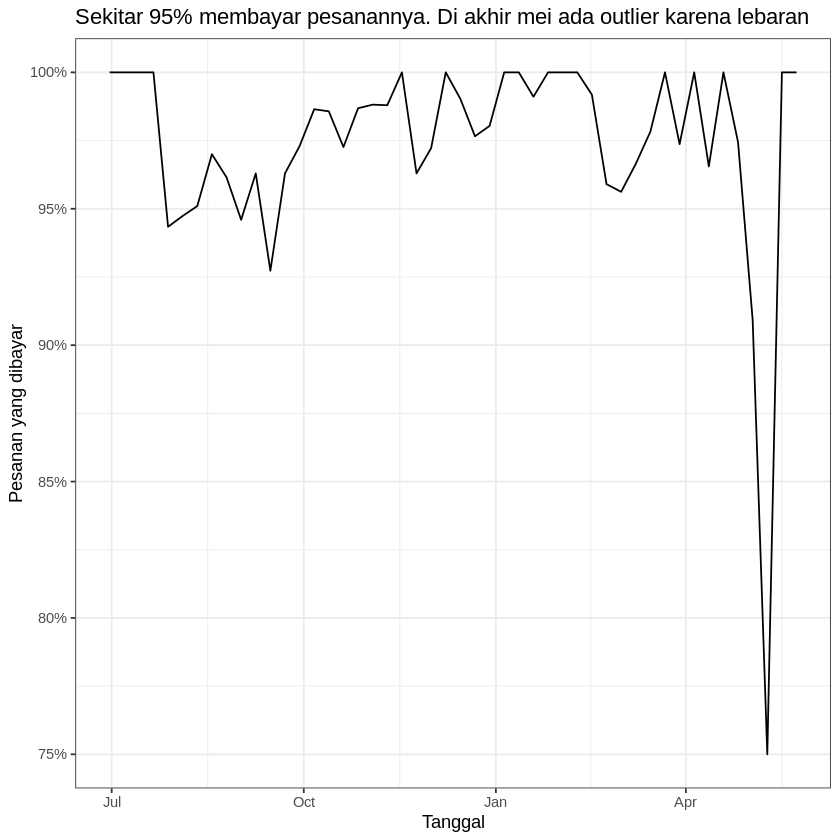

In [16]:
df_bayar_per_minggu <- df_loan_invest %>% 
  filter(!is.na(order)) %>%
  mutate(tanggal = floor_date(marketplace, 'week')) %>% 
  group_by(tanggal) %>%
  summarise(persen_bayar = mean(!is.na(pay))) 

ggplot(df_bayar_per_minggu) +
  geom_line(aes(x = tanggal, y = persen_bayar)) +
  scale_y_continuous(labels = scales::percent) +
  theme_bw() + 
  labs(title = "Sekitar 95% membayar pesanannya. Di akhir mei ada outlier karena lebaran",
       x = "Tanggal",
       y = "Pesanan yang dibayar")

#### [Waktu yang dibutuhkan investor untuk membayar pesanan](https://academy.dqlab.id/main/livecode/245/414/2090?pr=0)

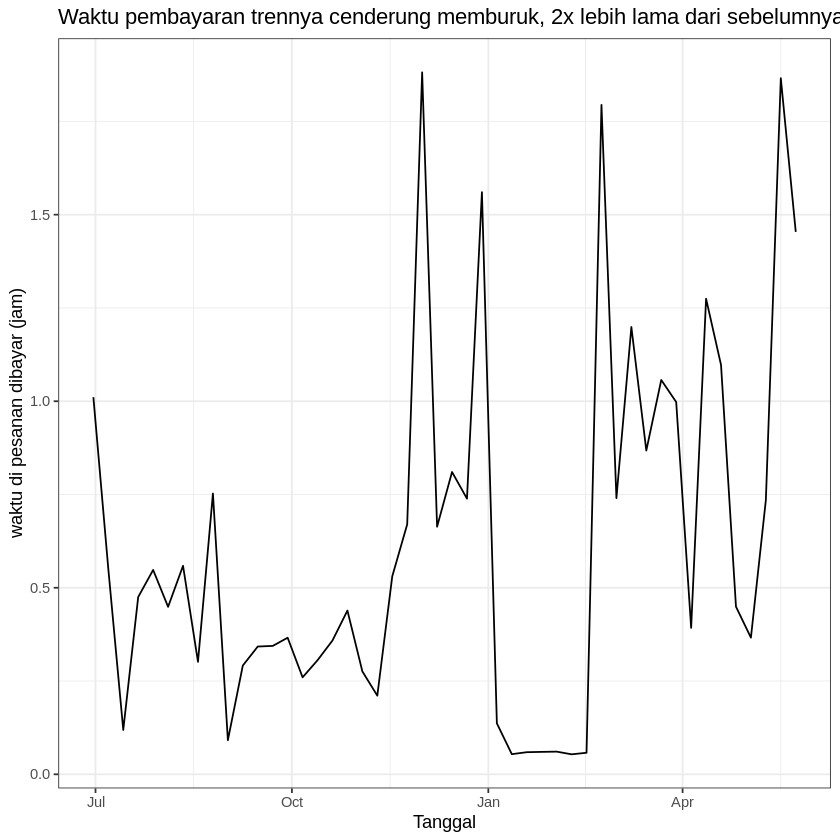

In [17]:
df_lama_bayar_per_minggu <- df_loan_invest %>% 
  filter(!is.na(pay)) %>%
  mutate(tanggal = floor_date(order, 'week'),
         lama_bayar = as.numeric(difftime(pay, order, units = "hour"))) %>% 
  group_by(tanggal) %>%
  summarise(lama_bayar = median(lama_bayar)) 

ggplot(df_lama_bayar_per_minggu) +
  geom_line(aes(x = tanggal, y = lama_bayar)) +
  theme_bw() + 
  labs(title = "Waktu pembayaran trennya cenderung memburuk, 2x lebih lama dari sebelumnya",
       x = "Tanggal",
       y = "waktu di pesanan dibayar (jam)")

Trend pada tahun 2020 cenderung lebih jelek daripada tahun 2019, hal ini mungkin karena adanya pandemi investor menjadi lebih lama untuk memprtimbangkan invest dimana, dan apakah pesanan yang sudah dibuat mau dibayar atau tidak.

## Analisis Summary Investor

#### [Trend Investor Register](https://academy.dqlab.id/main/livecode/245/415/2092?pr=0)

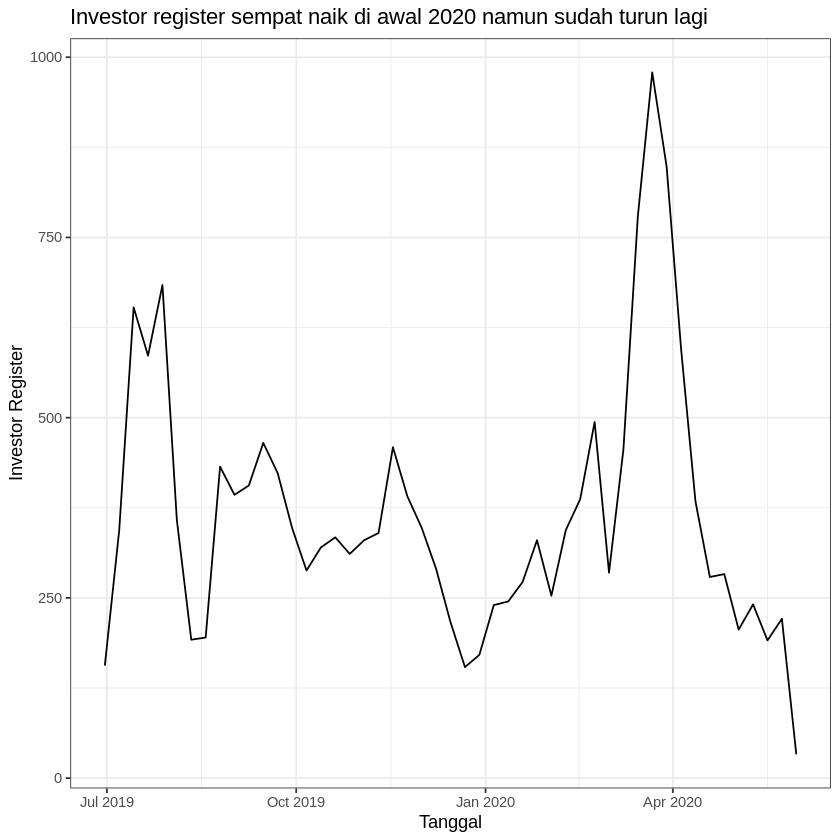

In [18]:
df_investor_register <- df_event %>% 
  filter(nama_event == 'investor_register') %>%
  mutate(tanggal = floor_date(created_at, 'week')) %>% 
  group_by(tanggal) %>%
  summarise(investor = n_distinct(investor_id)) 

ggplot(df_investor_register) +
  geom_line(aes(x = tanggal, y = investor)) +
  theme_bw() + 
  labs(title = "Investor register sempat naik di awal 2020 namun sudah turun lagi",
       x = "Tanggal",
       y = "Investor Register")

#### [Trend Investor Investasi Pertama](https://academy.dqlab.id/main/livecode/245/415/2093?pr=0)

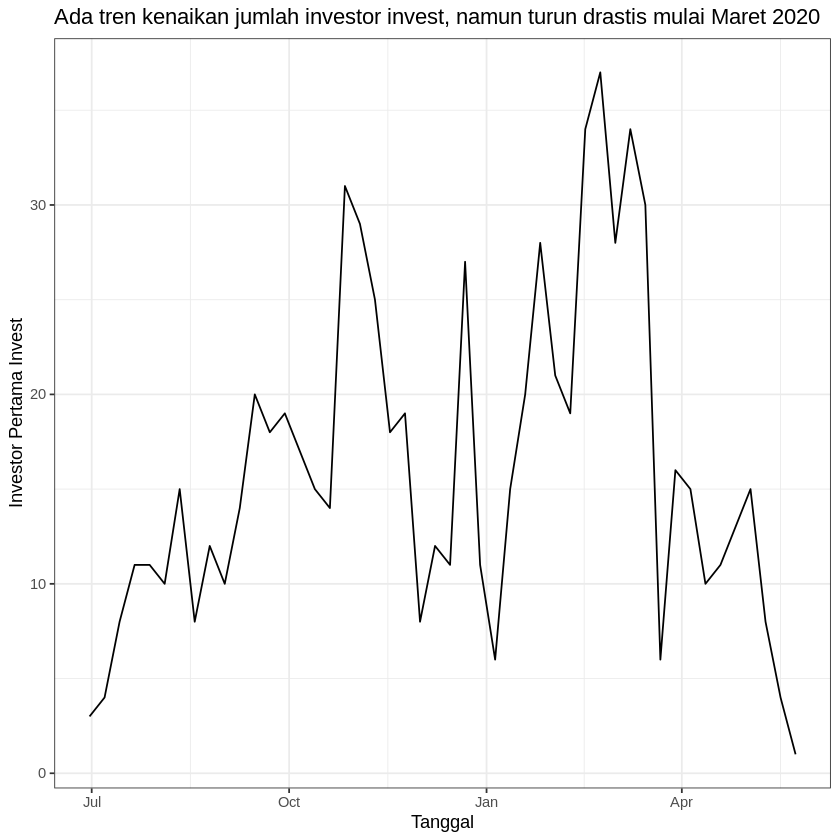

In [19]:
df_investor_pertama_invest <- df_event %>% 
  filter(nama_event == 'investor_pay_loan') %>%
  group_by(investor_id) %>% 
  summarise(pertama_invest = min(created_at)) %>% 
  mutate(tanggal = floor_date(pertama_invest, 'week')) %>% 
  group_by(tanggal) %>% 
  summarise(investor = n_distinct(investor_id)) 

ggplot(df_investor_pertama_invest) +
  geom_line(aes(x = tanggal, y = investor)) +
  theme_bw() + 
  labs(title = "Ada tren kenaikan jumlah investor invest, namun turun drastis mulai Maret 2020", x = "Tanggal", y = "Investor Pertama Invest")

#### [Cohort Pertama Invest berdasarkan Bulan Register](https://academy.dqlab.id/main/livecode/245/415/2094?pr=0)

In [20]:
df_register_per_investor <- df_event %>%
  filter(nama_event == 'investor_register') %>% 
  rename(tanggal_register = created_at) %>%  
  mutate(bulan_register = floor_date(tanggal_register, 'month'))  %>%  
  select(investor_id, tanggal_register, bulan_register) 

df_pertama_invest_per_investor <- df_event %>%
  filter(nama_event == 'investor_pay_loan') %>% 
  group_by(investor_id) %>% 
  summarise(pertama_invest = min(created_at)) 

df_register_per_investor %>% 
  left_join(df_pertama_invest_per_investor, by = 'investor_id') %>% 
  mutate(lama_invest = as.numeric(difftime(pertama_invest, tanggal_register, units = "day")) %/% 30) %>%  
  group_by(bulan_register, lama_invest) %>% 
  summarise(investor_per_bulan = n_distinct(investor_id)) %>% 
  group_by(bulan_register) %>% 
  mutate(register = sum(investor_per_bulan)) %>% 
  filter(!is.na(lama_invest)) %>% 
  mutate(invest = sum(investor_per_bulan)) %>% 
  mutate(persen_invest = scales::percent(invest/register)) %>% 
  mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/invest)) %>%  
  select(-investor_per_bulan) %>%  
  spread(lama_invest, breakdown_persen_invest)

`summarise()` has grouped output by 'bulan_register'. You can override using
the `.groups` argument.


bulan_register,register,invest,persen_invest,0,1,2,3,4,5,6,7,8,9
<dttm>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-07-01,2142,73,3%,61.6%,8.2%,6.8%,5.5%,1.4%,4.1%,5.5%,4.1%,1.4%,1.4%
2019-08-01,1458,74,5%,55.4%,8.1%,14.9%,10.8%,4.1%,2.7%,4.1%,NA,NA,NA
2019-09-01,1763,94,5%,67.0%,21.3%,4.3%,2.1%,3.2%,1.1%,1.1%,NA,NA,NA
2019-10-01,1437,83,6%,77.1%,8.4%,4.8%,7.2%,1.2%,1.2%,NA,NA,NA,NA
2019-11-01,1607,87,5%,75.9%,11.5%,9.2%,1.1%,1.1%,1.1%,NA,NA,NA,NA
2019-12-01,1085,55,5%,69.1%,16.4%,7.3%,5.5%,1.8%,NA,NA,NA,NA,NA
2020-01-01,1138,78,7%,78.2%,15.4%,3.8%,2.6%,NA,NA,NA,NA,NA,NA
2020-02-01,1520,115,8%,86.09%,6.96%,6.09%,0.87%,NA,NA,NA,NA,NA,NA
2020-03-01,2776,53,2%,94%,6%,NA,NA,NA,NA,NA,NA,NA,NA


Terihat bahwa untuk total register paling banyak adalah di bulan Maret 2020, seperti pada chart sebelumnya, hanya saja dari sebanyak itu sampai saat ini belum ada 2% yang sudah invest, sangat jauh dibandingkan bulan sebelumnya, yang bisa mencapai 7% lebih. yang merupakan conversion rate paling tinggi.

Pada umumnya, hanya 5% investor dari semua investor yang mendaftar akan convert. Dan ketike convert mayoritas mereka melakukannya di bulan pertama (kurang dari 30 hari) sejak registrasi.

#### [Cohort Retention Invest](https://academy.dqlab.id/main/livecode/245/415/2095?pr=0)

In [21]:
df_investasi_per_investor <- df_event %>%
  filter(nama_event == 'investor_pay_loan') %>%
  rename(tanggal_invest = created_at) %>%
  select(investor_id, tanggal_invest)

df_pertama_invest_per_investor %>%
  mutate(bulan_pertama_invest = floor_date(pertama_invest, 'month')) %>%
  inner_join(df_investasi_per_investor, by = 'investor_id') %>%
  mutate(jarak_invest = as.numeric(difftime(tanggal_invest, pertama_invest, units = "day")) %/% 30) %>%
  group_by(bulan_pertama_invest, jarak_invest) %>%
  summarise(investor_per_bulan = n_distinct(investor_id)) %>%
  group_by(bulan_pertama_invest) %>%
  mutate(investor = max(investor_per_bulan)) %>%
  mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/investor)) %>%
  select(-investor_per_bulan) %>%
  spread(jarak_invest, breakdown_persen_invest) %>%
  select(-`0`)

`summarise()` has grouped output by 'bulan_pertama_invest'. You can override
using the `.groups` argument.


bulan_pertama_invest,investor,1,2,3,4,5,6,7,8,10
<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-07-01,31,25.8%,25.8%,19.4%,6.5%,16.1%,16.1%,19.4%,12.9%,3.2%
2019-08-01,51,35.3%,19.6%,25.5%,19.6%,19.6%,21.6%,9.8%,2.0%,NA
2019-09-01,70,25.7%,18.6%,18.6%,15.7%,18.6%,10.0%,1.4%,NA,NA
2019-10-01,80,32.5%,28.8%,17.5%,23.7%,8.7%,6.2%,NA,NA,NA
2019-11-01,99,30.3%,24.2%,24.2%,8.1%,7.1%,1.0%,NA,NA,NA
2019-12-01,63,38.1%,30.2%,3.2%,4.8%,1.6%,NA,NA,NA,NA
2020-01-01,71,32.4%,12.7%,4.2%,1.4%,NA,NA,NA,NA,NA
2020-02-01,115,16.5%,3.5%,0.9%,NA,NA,NA,NA,NA,NA
2020-03-01,102,10.8%,1.0%,NA,NA,NA,NA,NA,NA,NA


Terihat bahwa pada bulan febuari terdapat investor yang melakukan investasi pertama paling banyak dibandingkan bulan lainnya. Akan tetapi kelompok tersebut retention nya jelak dibandingkan yang lain. pada 1 bulan setelah investasi pertama, hanya 16% investor saja yang investasi lagi. Ini hanya setengah dari tren pada bulan bulan sebelumnya, dimana sekitar 30% investor akan invest lagi 1 bulan setelah investasi pertama.

cohort yang paling stabil adalah di bulan Agustus 2019. Di sekitar angka 20% setiap bulannya, alaupun pada bulan ketujuh persentasnya ikut turun juga.

### Kesimpulan



*   Pada bulan Maret, April sampai pertangah Mei terjadi banyak penurunan pada metriks yang dianalisis, hal ini mungkin karena adanya pandemi Covid19, perlu dianalisis lebih lanjut apakah memang karena itu.
*   Secara Umum, 5% dari total investor yang register setiap bulannya, akan melakukan investasi, dan mayoritas dilakukan pada 30 hari pertama setelah register, dan sebagian kecil di bulan kedua. Di bulan selanjutnya peluangnya sangat kecil untuk bisa convert. Sehingga perlu dipastikan bagaimana journey investor tersebut lancar di bulan pertama, sehingga mau convert invest.


*   Selenjutnya perlu dilihat juga setelah invest pertama itu invest lagi di bulan bulan selanjutnya. Secara umum 30% investor akan invest lagi pada bulan berikutnya.
*   Pada bulan Febuari, conversion rate nya bagus, paling tinggi yakni 7.57%, secara jumlah juga paling banyak, tapi ketika dilihat retentionnya, hanya 16% yang invest pada bulan selanjutnya, hanya setengahnya dari kategori bulan bulan lainnya.





